<a href="https://colab.research.google.com/github/thhelen/-Predictive-Modeling-for-State-Fragility-Assessment/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc, html
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from dash.dependencies import Input, Output

In [2]:
df = pd.read_csv('combined_train_clean.csv')
df

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN
1,1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN
2,2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN
3,3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN
4,4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,3164,Denmark,2023,174th,17.9,1.1,1.4,3.1,1.0,1.8,1.0,0.3,1.7,0.6,2.3,3.0,0.6,NaN
2534,3165,Switzerland,2023,175th,17.8,1.4,1.0,2.1,1.6,2.4,1.0,0.3,1.6,0.4,2.4,3.2,0.4,NaN
2535,3166,New Zealand,2023,176th,16.7,1.6,1.4,2.0,2.6,2.6,1.6,0.5,1.1,0.5,1.1,1.2,0.5,NaN
2536,3167,Finland,2023,177th,16.0,2.0,1.4,0.3,2.7,1.6,1.5,0.4,1.0,0.5,1.7,1.9,1.0,NaN


In [3]:
continent_mapping = {
    'Africa': [
        'Nigeria','Congo Democratic Republic',"Cote d'Ivoire", 'Ethiopia','Guinea Bissau', 'Egypt', 'DR Congo', 'Tanzania',
        'South Africa', 'Kenya', 'Uganda', 'Sudan', 'Algeria',
        'Morocco', 'Angola', 'Ghana', 'Mozambique', 'Madagascar',
        'Côte d\'Ivoire', 'Cameroon', 'Niger', 'Mali', 'Burkina Faso',
        'Malawi', 'Zambia', 'Chad', 'Somalia', 'Senegal',
        'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi',
        'Tunisia', 'South Sudan', 'Togo', 'Sierra Leone', 'Libya',
        'Congo', 'Central African Republic', 'Liberia', 'Mauritania', 'Eritrea',
        'Gambia', 'Botswana', 'Namibia', 'Gabon', 'Lesotho',
        'Guinea-Bissau', 'Equatorial Guinea', 'Mauritius', 'Eswatini', 'Djibouti',
        'Comoros', 'Cabo Verde', 'Sao Tome & Principe', 'Seychelles'
    ],'Asia': [
        'India', 'China', 'Indonesia', 'Pakistan', 'Bangladesh',
        'Japan', 'Philippines', 'Vietnam', 'Iran', 'Turkey',
        'Thailand', 'Myanmar', 'South Korea', 'Iraq', 'Afghanistan',
        'Saudi Arabia', 'Uzbekistan', 'Yemen', 'Malaysia', 'Nepal',
        'North Korea', 'Syria', 'Sri Lanka', 'Kazakhstan', 'Cambodia',
        'Jordan', 'Azerbaijan', 'Tajikistan', 'United Arab Emirates', 'Israel',
        'Laos', 'Kyrgyzstan', 'Turkmenistan', 'Singapore', 'State of Palestine',
        'Lebanon', 'Oman', 'Kuwait', 'Georgia', 'Mongolia',
        'Armenia', 'Qatar', 'Bahrain', 'Timor-Leste', 'Cyprus',
        'Bhutan', 'Maldives', 'Brunei'
    ],'Europe': [
        'Russia', 'Germany', 'United Kingdom', 'France', 'Italy',
        'Spain', 'Poland', 'Ukraine', 'Romania', 'Netherlands',
        'Belgium', 'Sweden', 'Czech Republic (Czechia)', 'Greece', 'Portugal',
        'Hungary', 'Belarus', 'Austria', 'Switzerland', 'Serbia',
        'Bulgaria', 'Denmark', 'Slovakia', 'Finland', 'Norway',
        'Ireland', 'Croatia', 'Moldova', 'Bosnia and Herzegovina', 'Albania',
        'Lithuania', 'Slovenia', 'North Macedonia', 'Latvia', 'Estonia',
        'Luxembourg', 'Montenegro', 'Malta', 'Iceland', 'Andorra',
        'Liechtenstein', 'Monaco', 'San Marino', 'Holy See'
    ],'Oceania': [
        'Australia', 'Papua New Guinea', 'New Zealand', 'Fiji',
        'Solomon Islands', 'Micronesia', 'Vanuatu', 'Samoa',
        'Kiribati', 'Tonga', 'Marshall Islands', 'Palau',
        'Nauru', 'Tuvalu'
    ],'North America': [
        'United States', 'Mexico', 'Canada', 'Guatemala', 'Haiti',
        'Dominican Republic', 'Cuba', 'Honduras', 'Nicaragua', 'El Salvador',
        'Costa Rica', 'Panama', 'Puerto Rico', 'Jamaica', 'Trinidad and Tobago',
        'Bahamas', 'Belize', 'Guadeloupe', 'Martinique', 'Barbados',
        'Curaçao', 'Saint Lucia', 'Grenada', 'Aruba', 'Saint Vincent and the Grenadines',
        'United States Virgin Islands', 'Antigua and Barbuda', 'Dominica', 'Cayman Islands', 'Bermuda',
        'Greenland', 'Saint Kitts and Nevis', 'Turks and Caicos Islands', 'Sint Maarten', 'Saint Martin',
        'British Virgin Islands', 'Caribbean Netherlands', 'Anguilla', 'Saint Barthélemy', 'Saint Pierre and Miquelon',
        'Montserrat'
    ],'South America': [
        'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
        'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana',
        'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'
    ]}
country_to_continent = {country: continent for continent, countries in continent_mapping.items() for country in countries}
df['Continent'] = df['Country'].map(country_to_continent)


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Continent_Label'] = label_encoder.fit_transform(df['Continent'])
df

,Unnamed: 0,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Continent,Continent_Label
0,0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8,NaN,Africa,0
1,1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0,NaN,Africa,0
2,2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0,NaN,Africa,0
3,3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0,NaN,Asia,1
4,4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0,NaN,Africa,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,3164,Denmark,2023,174th,17.9,1.1,1.4,3.1,1.0,1.8,1.0,0.3,1.7,0.6,2.3,3.0,0.6,NaN,Europe,2
2534,3165,Switzerland,2023,175th,17.8,1.4,1.0,2.1,1.6,2.4,1.0,0.3,1.6,0.4,2.4,3.2,0.4,NaN,Europe,2
2535,3166,New Zealand,2023,176th,16.7,1.6,1.4,2.0,2.6,2.6,1.6,0.5,1.1,0.5,1.1,1.2,0.5,NaN,Oceania,4
2536,3167,Finland,2023,177th,16.0,2.0,1.4,0.3,2.7,1.6,1.5,0.4,1.0,0.5,1.7,1.9,1.0,NaN,Europe,2


In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Country_Label'] = label_encoder.fit_transform(df['Country'])
df = df.drop(columns=['Unnamed: 0'])

In [6]:
country_continent_mapping = {}

for index, row in df.iterrows():
    country_label = row['Country_Label']
    continent_label = row['Continent_Label']
    if country_label not in country_continent_mapping:
        country_continent_mapping[country_label] = continent_label
print(country_continent_mapping)

{119: 0, 29: 0, 31: 0, 61: 1, 140: 0, 25: 0, 114: 0, 55: 3, 97: 1, 0: 1, 53: 0, 73: 0, 24: 0, 94: 1, 20: 0, 111: 0, 138: 1, 86: 1, 9: 1, 88: 1, 130: 0, 93: 0, 135: 1, 107: 0, 118: 1, 43: 0, 28: 5, 76: 0, 19: 0, 38: 0, 59: 1, 68: 0, 122: 1, 15: 2, 22: 0, 3: 0, 126: 0, 13: 1, 70: 1, 79: 0, 123: 1, 106: 2, 92: 0, 129: 1, 54: 0, 21: 1, 36: 3, 99: 4, 10: 2, 52: 3, 40: 0, 60: 1, 41: 0, 110: 2, 14: 5, 27: 1, 82: 2, 91: 3, 48: 1, 8: 1, 33: 3, 37: 5, 136: 5, 72: 1, 139: 0, 101: 5, 102: 1, 137: 1, 124: 0, 2: 0, 108: 1, 66: 1, 56: 3, 84: 0, 39: 3, 125: 1, 85: 0, 78: 0, 128: 1, 47: 0, 46: 0, 81: 3, 131: 2, 100: 5, 67: 1, 5: 1, 12: 0, 87: 0, 34: 1, 58: 1, 1: 2, 74: 0, 16: 0, 64: 3, 77: 1, 109: 0, 127: 0, 17: 5, 105: 2, 18: 2, 32: 2, 69: 1, 50: 0, 98: 3, 83: 1, 71: 2, 115: 0, 42: 2, 75: 2, 30: 3, 103: 2, 57: 2, 96: 1, 80: 0, 134: 5, 51: 2, 4: 5, 116: 1, 49: 2, 117: 2, 113: 2, 63: 2, 133: 3, 45: 2, 132: 2, 104: 2, 26: 5, 112: 1, 89: 2, 65: 1, 7: 2, 35: 2, 11: 2, 23: 3, 6: 4, 90: 4, 121: 2, 62: 2, 44:

In [7]:
df.describe()

,Year,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Continent_Label,Country_Label
count,2538.00000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,282.000000,2538.000000,2538.000000
mean,2014.50000,70.348164,5.685725,6.423938,6.131543,5.690833,6.183210,5.454320,6.199561,5.731305,5.922627,6.126124,5.257107,5.542219,-1.292104,1.446809,70.000000
std,5.18915,24.688066,2.456103,2.564191,2.122635,1.970781,2.101103,2.068445,2.689133,2.527024,2.500580,2.293144,2.416711,2.462962,1.311032,1.426607,40.710191
min,2006.00000,14.500000,0.300000,0.700000,0.300000,1.000000,0.500000,0.400000,0.200000,0.626666,0.300000,0.700000,0.400000,0.300000,-5.300000,0.000000,0.000000
25%,2010.00000,51.825000,3.800000,4.300000,4.500000,4.300000,4.700000,4.000000,4.400000,3.800000,3.916944,4.300000,3.200000,3.800000,-2.188855,0.000000,35.000000
50%,2014.50000,75.464265,6.000000,7.200000,6.200000,5.800000,6.600000,5.900000,6.900000,6.000000,6.500000,6.400000,5.200000,5.900000,-1.600000,1.000000,70.000000
75%,2019.00000,88.500000,7.500000,8.400000,7.800000,7.100000,7.900000,7.028618,8.300000,8.000000,7.800000,8.100000,7.200000,7.300000,-0.700677,2.000000,105.000000
max,2023.00000,114.900000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.613527,5.000000,140.000000


In [8]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]

In [9]:
features = ['Country_Label', 'Continent_Label','Year']
target = 'Total'

In [10]:
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]


In [11]:
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}

In [12]:
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)

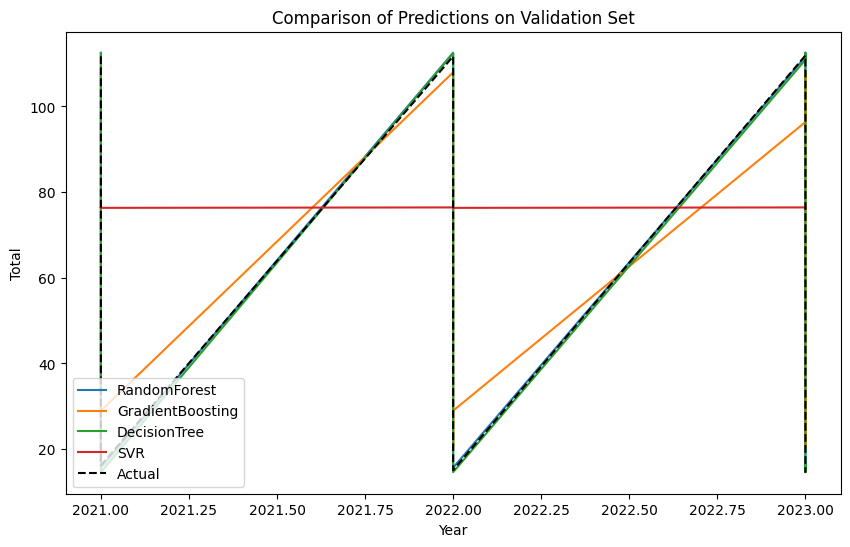

In [15]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()

In [16]:
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

Mean Squared Error Scores:
RandomForest: 8.807863452388958
GradientBoosting: 123.64488312583109
DecisionTree: 7.546909336020124
SVR: 682.7783839269673


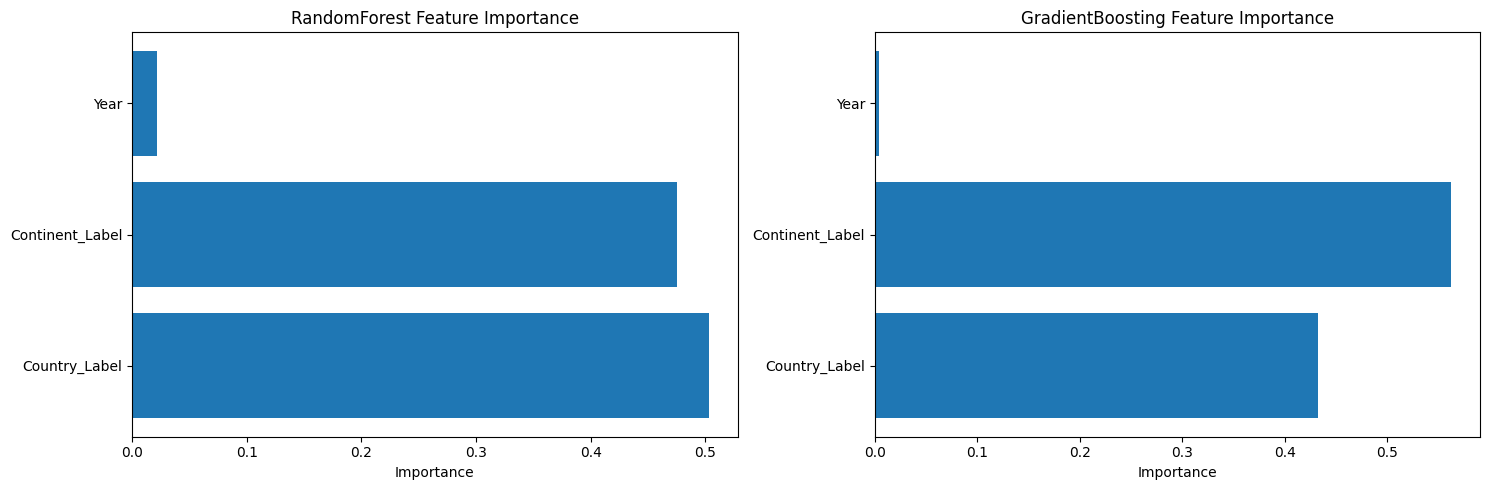

In [17]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [19]:
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()
ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 8.685610174185966
MSE for Decision Tree: 7.546909336020124
MSE for Ensemble: 7.848031477949166


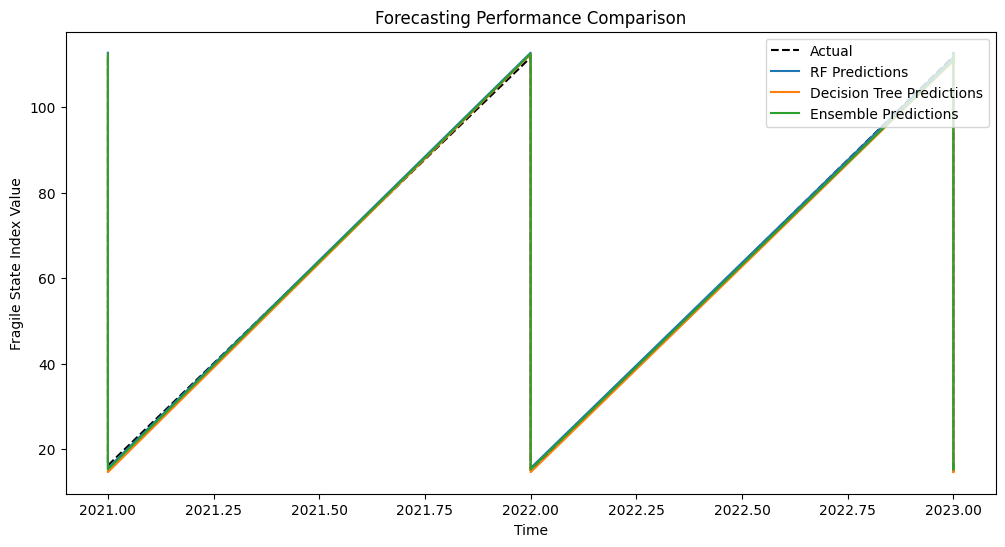

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [23]:
future_years = range(2024, 2034)
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'Total': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'Total']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])

fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="Total",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'Total': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [24]:
final = pd.DataFrame()
final['Country'] = combined_future['Country']
final['Year'] = combined_future['Year']
final['Continent'] = combined_future['Continent']
final['Total'] = combined_future['Total']

In [26]:
combined_future[combined_future['Country_Label'] == 140].head()

,Country_Label,Continent_Label,Year,Total,Country,Continent
4,140,0,2006,108.9,Zimbabwe,Afghanistan
144,140,0,2007,110.1,Zimbabwe,Afghanistan
284,140,0,2008,112.5,Zimbabwe,Afghanistan
424,140,0,2009,114.0,Zimbabwe,Afghanistan
567,140,0,2010,110.2,Zimbabwe,Afghanistan


In [27]:
groups_of_columns = [['E1: Economy', 'E2: Economic Inequality', 'E3: Human Flight and Brain Drain'], ['P1: State Legitimacy', 'P2: Public Services', 'P3: Human Rights'], ['C1: Security Apparatus', 'C2: Factionalized Elites', 'C3: Group Grievance'], ['S1: Demographic Pressures', 'S2: Refugees and IDPs', 'X1: External Intervention']]
for group in groups_of_columns:
    df[f'{group[0][0]}_avg'] = df[group].mean(axis=1)
df.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,...,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year,Continent,Continent_Label,Country_Label,E_avg,P_avg,C_avg,S_avg
0,Sudan,2006,1st,112.3,9.8,9.1,9.7,7.5,9.2,9.1,...,9.7,9.8,NaN,Africa,0,119,8.600000,9.600000,9.533333,9.700000
1,Congo Democratic Republic,2006,2nd,110.1,9.8,9.6,9.1,8.1,9.0,8.0,...,9.5,10.0,NaN,Africa,0,29,8.366667,9.166667,9.500000,9.666667
2,Cote d'Ivoire,2006,3rd,109.2,9.8,9.8,9.8,9.0,8.0,8.5,...,7.6,10.0,NaN,Africa,0,31,8.500000,9.300000,9.800000,8.800000
3,Iraq,2006,4th,109.0,9.8,9.7,9.8,8.2,8.7,9.1,...,8.3,10.0,NaN,Asia,1,61,8.666667,8.833333,9.766667,9.066667
4,Zimbabwe,2006,5th,108.9,9.4,8.5,8.5,9.8,9.2,9.0,...,8.9,8.0,NaN,Africa,0,140,9.333333,9.300000,8.800000,8.866667


PREDICTING E_AVG

In [29]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'E_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)

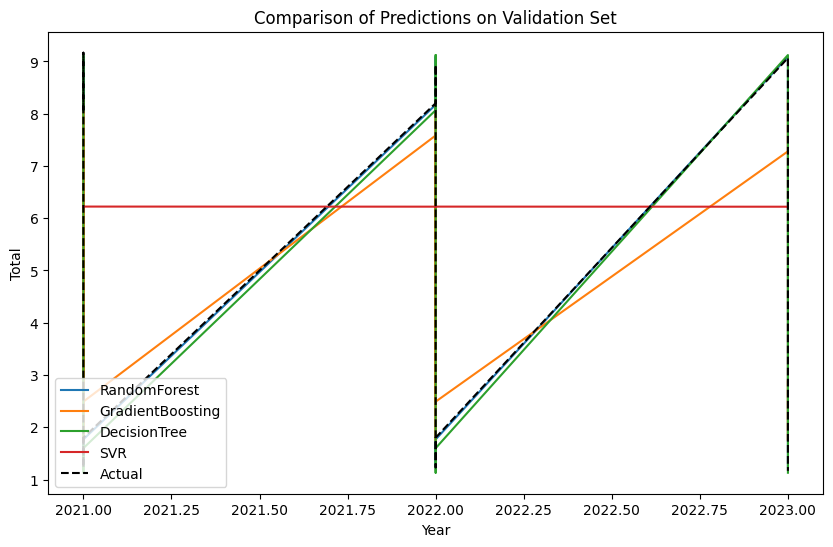

Mean Squared Error Scores:
RandomForest: 0.11450723225460598
GradientBoosting: 0.8141269881184184
DecisionTree: 0.10686070926827604
SVR: 4.2114433800064015


In [30]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

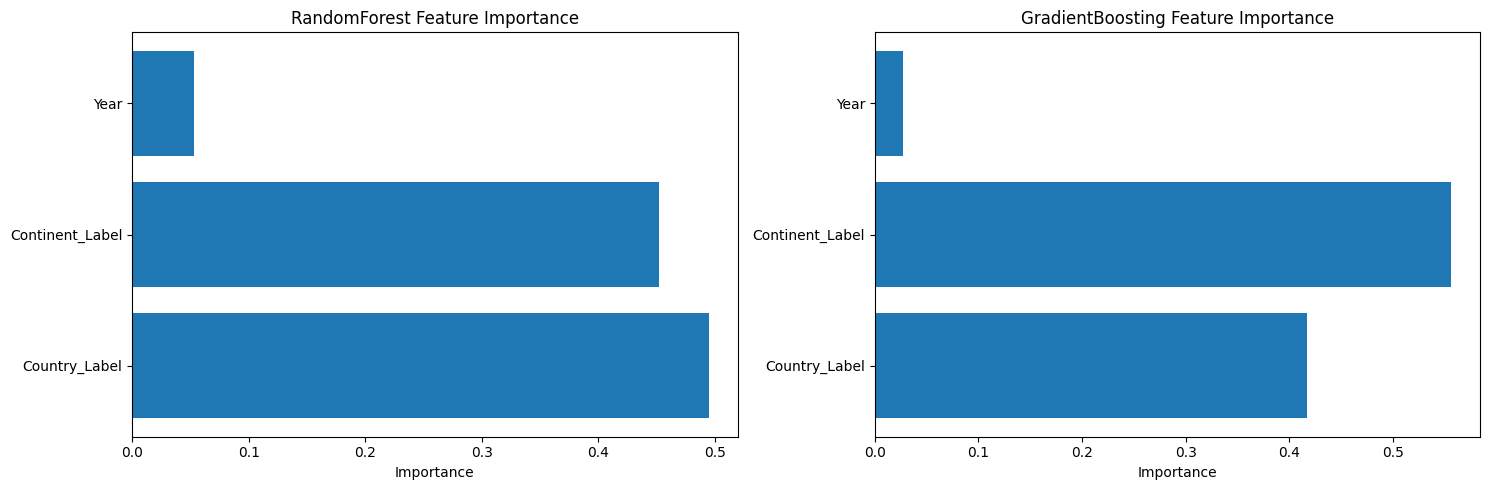

In [31]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [32]:
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.11442264745287818
MSE for Decision Tree: 0.10686070926827604
MSE for Ensemble: 0.1079483939175051


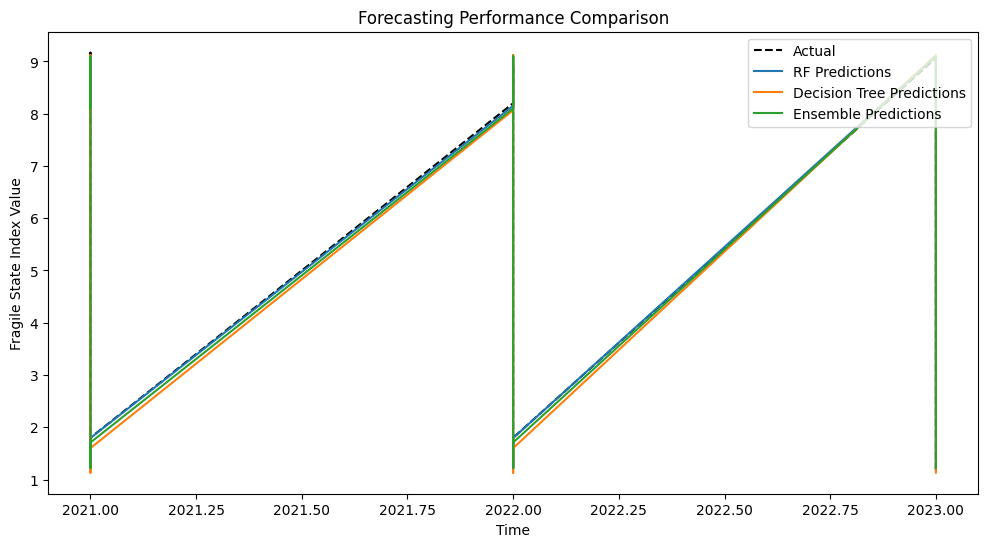

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [34]:
future_years = range(2024, 2034)
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'E_avg': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'E_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])

fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="E_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'E_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [35]:
final['E_avg'] = combined_future['E_avg']

In [37]:
combined_future[combined_future['Country_Label'] == 140].head()

,Country_Label,Continent_Label,Year,E_avg,Country,Continent
4,140,0,2006,9.333333,Zimbabwe,Afghanistan
144,140,0,2007,9.533333,Zimbabwe,Afghanistan
284,140,0,2008,9.866667,Zimbabwe,Afghanistan
424,140,0,2009,9.900000,Zimbabwe,Afghanistan
567,140,0,2010,9.566667,Zimbabwe,Afghanistan


PREDICTING P_AVG

In [38]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'P_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)

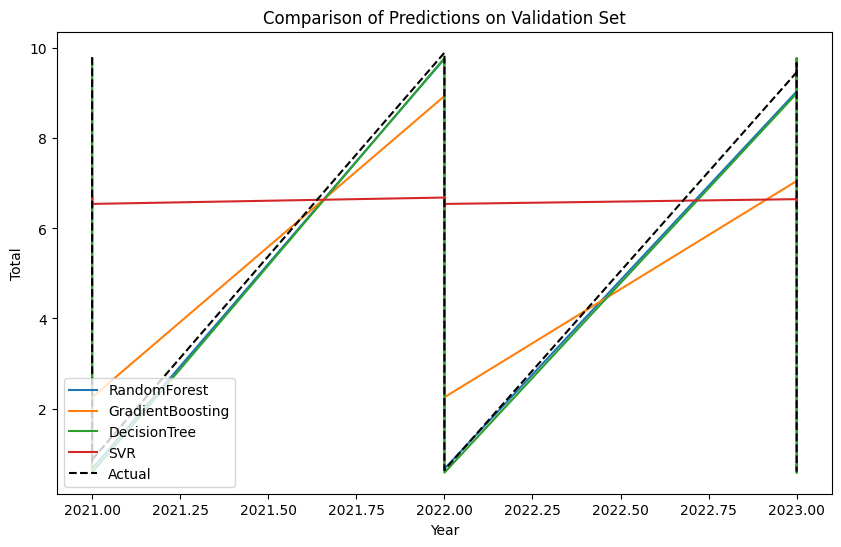

Mean Squared Error Scores:
RandomForest: 0.10939006715759286
GradientBoosting: 1.213687749519757
DecisionTree: 0.10873003412992266
SVR: 6.9193618043540015


In [39]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

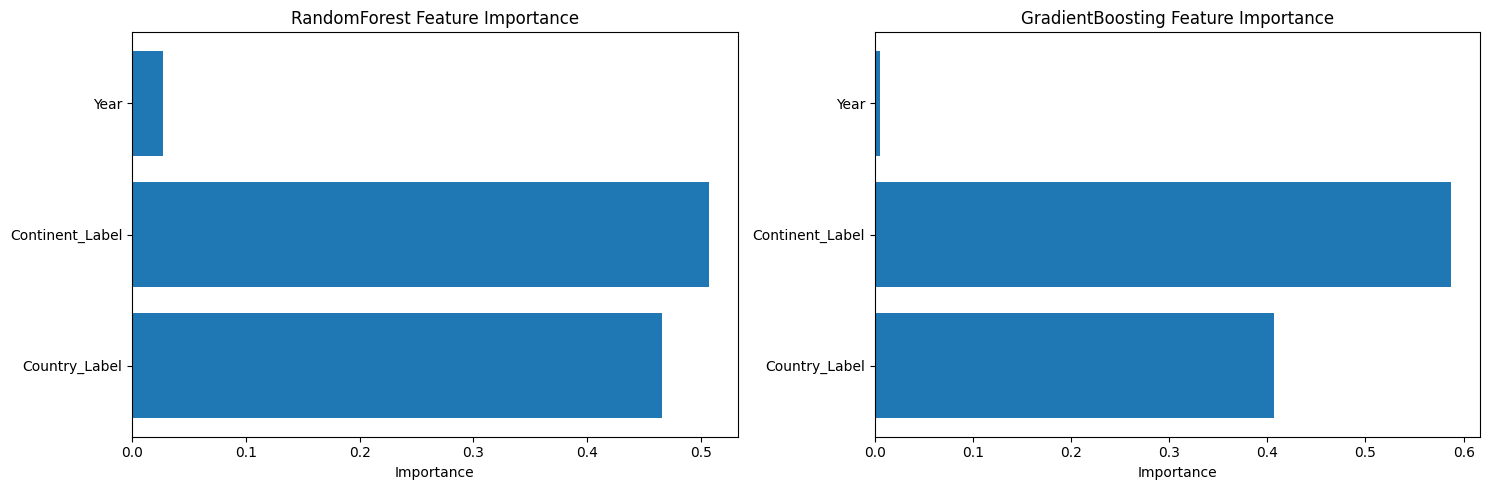

In [40]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [41]:
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.10835038333445748
MSE for Decision Tree: 0.10873003412992266
MSE for Ensemble: 0.10750726606978199


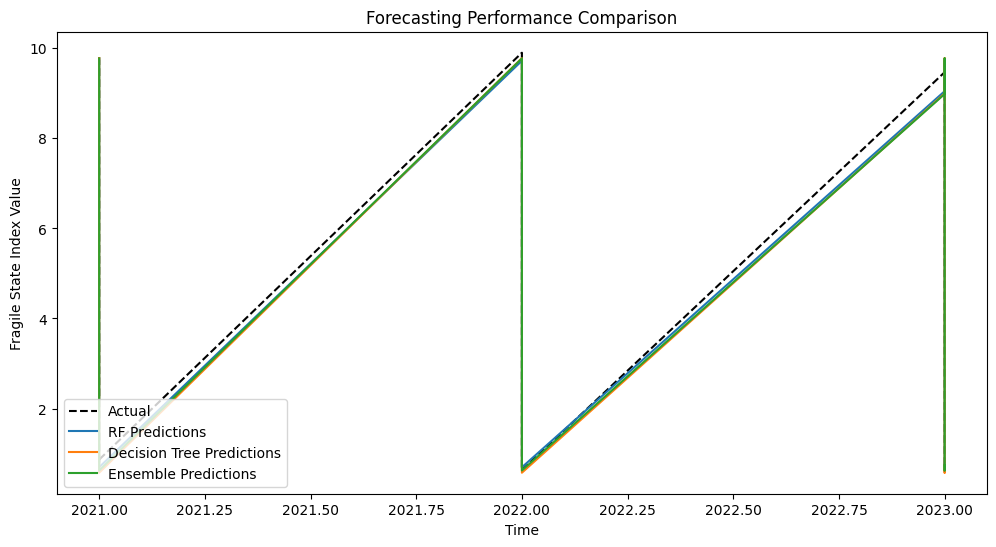

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [43]:
future_years = range(2024, 2034)
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'P_avg': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'P_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])
fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="P_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'P_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [44]:
final['P_avg'] = combined_future['P_avg']

In [45]:
combined_future[combined_future['Country_Label'] == 140]

,Country_Label,Continent_Label,Year,P_avg,Country,Continent
4,140,0,2006,9.300000,Zimbabwe,Afghanistan
144,140,0,2007,9.600000,Zimbabwe,Afghanistan
284,140,0,2008,9.633333,Zimbabwe,Afghanistan
424,140,0,2009,9.833333,Zimbabwe,Afghanistan
567,140,0,2010,9.500000,Zimbabwe,Afghanistan
710,140,0,2011,9.166667,Zimbabwe,Afghanistan
850,140,0,2012,9.133333,Zimbabwe,Afghanistan
995,140,0,2013,9.066667,Zimbabwe,Afghanistan
1137,140,0,2014,8.900000,Zimbabwe,Afghanistan
1283,140,0,2015,8.600000,Zimbabwe,Afghanistan


PREDICTING C_AVG

In [46]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'C_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)

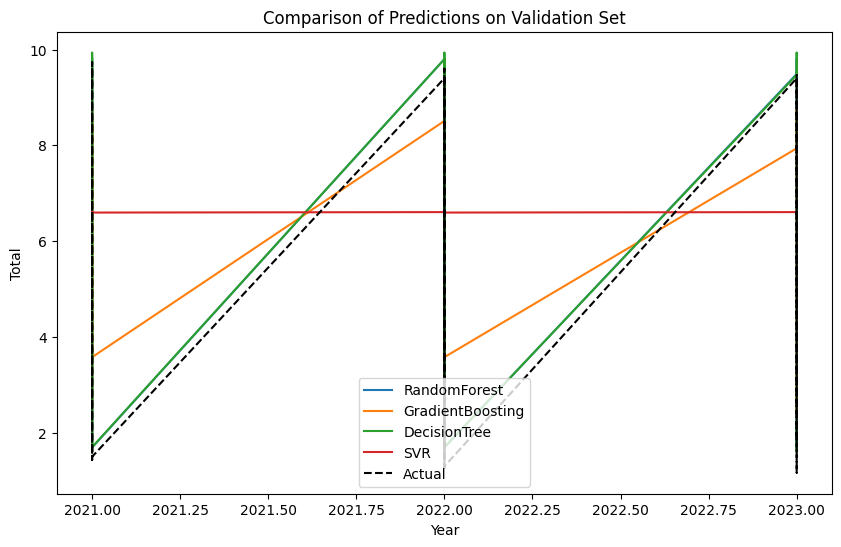

Mean Squared Error Scores:
RandomForest: 0.1053404250503529
GradientBoosting: 1.2574636609356484
DecisionTree: 0.08852086116963286
SVR: 5.080225917332704


In [47]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

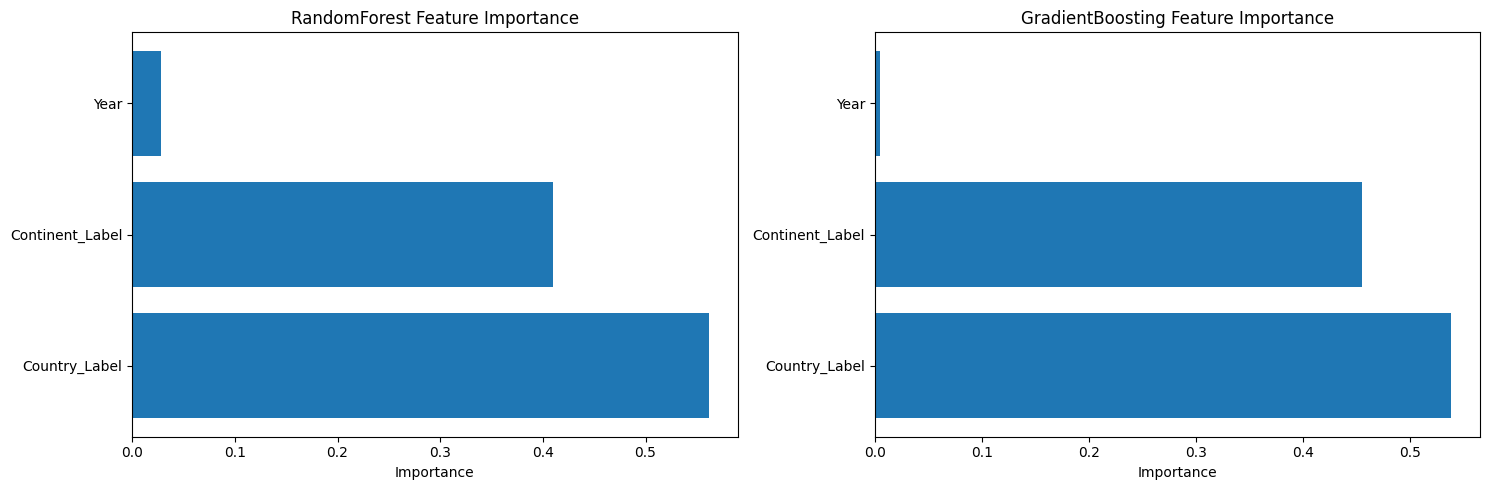

In [48]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')
axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')
plt.tight_layout()
plt.show()

In [49]:
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)
mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.10329381965457
MSE for Decision Tree: 0.08852086116963286
MSE for Ensemble: 0.09540288847918715


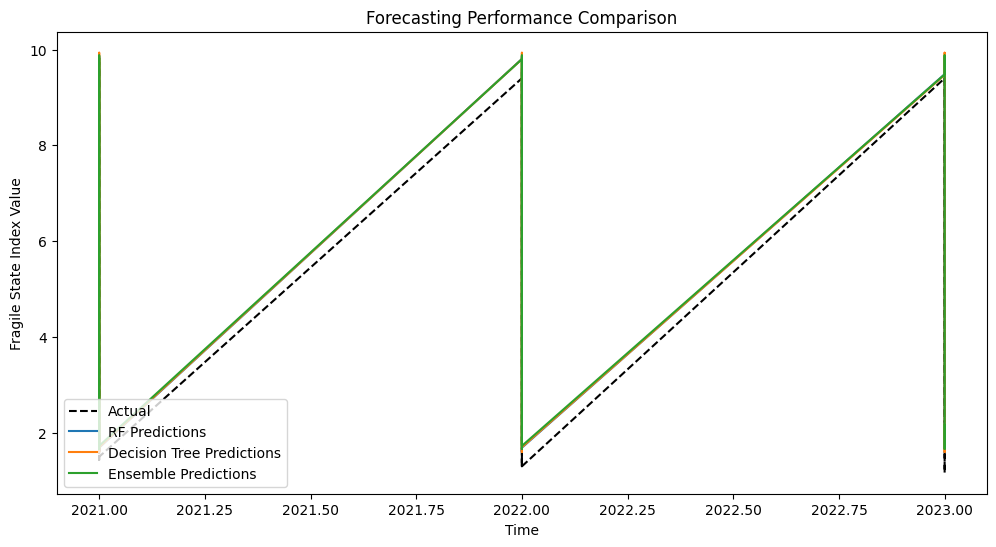

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [51]:
future_years = range(2024, 2034)
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]
y_pred_future = ensemble_model.predict(X_future)
future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'C_avg': y_pred_future
})
combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'C_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])
fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="C_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'C_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [52]:
final['C_avg'] = combined_future['C_avg']

In [53]:
combined_future[combined_future['Country_Label'] == 140].head()

,Country_Label,Continent_Label,Year,C_avg,Country,Continent
4,140,0,2006,8.800000,Zimbabwe,Afghanistan
144,140,0,2007,9.100000,Zimbabwe,Afghanistan
284,140,0,2008,9.433333,Zimbabwe,Afghanistan
424,140,0,2009,9.433333,Zimbabwe,Afghanistan
567,140,0,2010,9.166667,Zimbabwe,Afghanistan


PREDICTING S_AVG

In [54]:
train_data = df[df['Year'] <= 2020]
validation_data = df[df['Year'] >= 2021]
features = ['Country_Label', 'Continent_Label','Year']
target = 'S_avg'
X_train, y_train = train_data[features], train_data[target]
X_val, y_val = validation_data[features], validation_data[target]
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'SVR': SVR()
}
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_val)

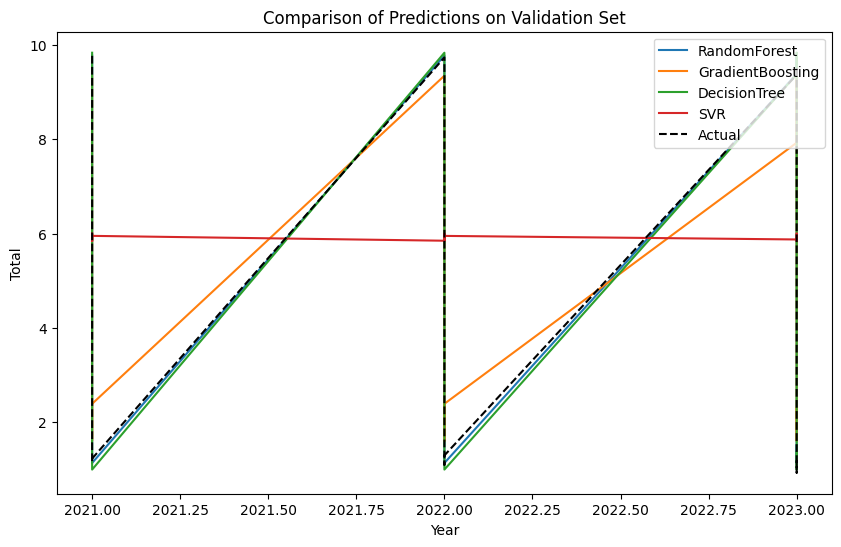

Mean Squared Error Scores:
RandomForest: 0.18914168632300055
GradientBoosting: 1.265260869972717
DecisionTree: 0.1854202455160085
SVR: 4.987833792945896


In [55]:
plt.figure(figsize=(10, 6))
for model_name, prediction in predictions.items():
    plt.plot(validation_data['Year'], prediction, label=model_name)

plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Comparison of Predictions on Validation Set')
plt.legend()
plt.show()
mse_scores = {model_name: mean_squared_error(y_val, prediction) for model_name, prediction in predictions.items()}
print("Mean Squared Error Scores:")
for model_name, mse_score in mse_scores.items():
    print(f"{model_name}: {mse_score}")

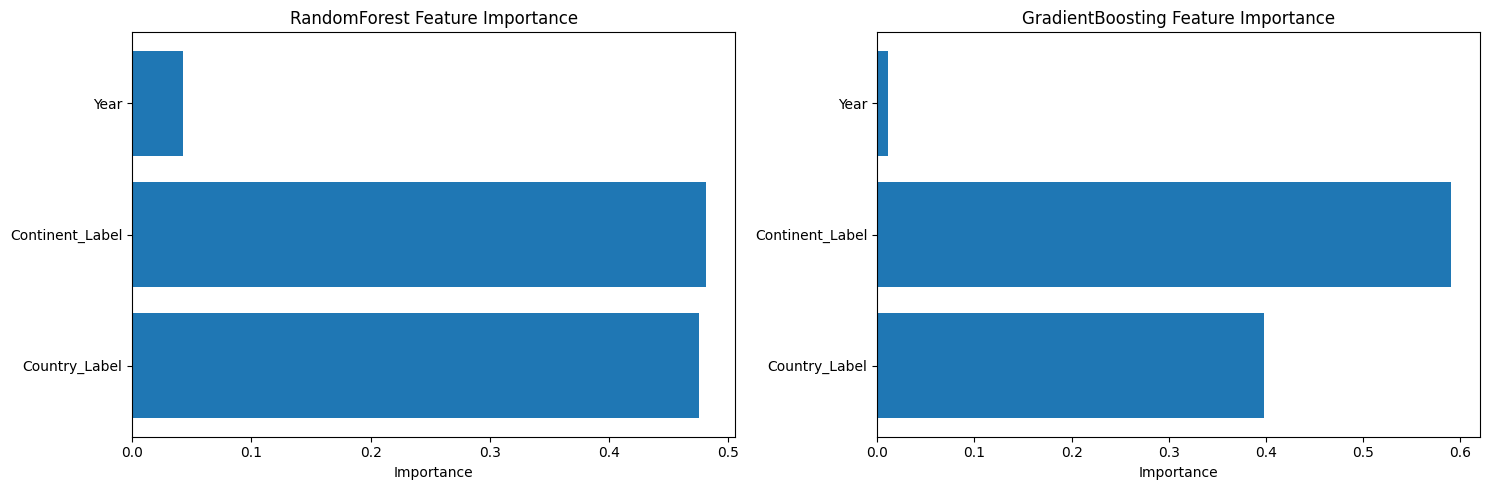

In [56]:
rf_model = models['RandomForest']
rf_feature_importance = rf_model.feature_importances_
gb_model = models['GradientBoosting']
gb_feature_importance = gb_model.feature_importances_
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].barh(features, rf_feature_importance)
axes[0].set_title('RandomForest Feature Importance')
axes[0].set_xlabel('Importance')

axes[1].barh(features, gb_feature_importance)
axes[1].set_title('GradientBoosting Feature Importance')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

In [57]:
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

ensemble_model = VotingRegressor([('svr', rf_model), ('dt', dt_model)])

rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
ensemble_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_pred_dt = dt_model.predict(X_val)
y_pred_ensemble = ensemble_model.predict(X_val)

mse_rf = mean_squared_error(y_val, y_pred_rf)
mse_dt = mean_squared_error(y_val, y_pred_dt)
mse_ensemble = mean_squared_error(y_val, y_pred_ensemble)

print(f'MSE for RF: {mse_rf}')
print(f'MSE for Decision Tree: {mse_dt}')
print(f'MSE for Ensemble: {mse_ensemble}')

MSE for RF: 0.19040134765998473
MSE for Decision Tree: 0.1854202455160085
MSE for Ensemble: 0.18505440564533226


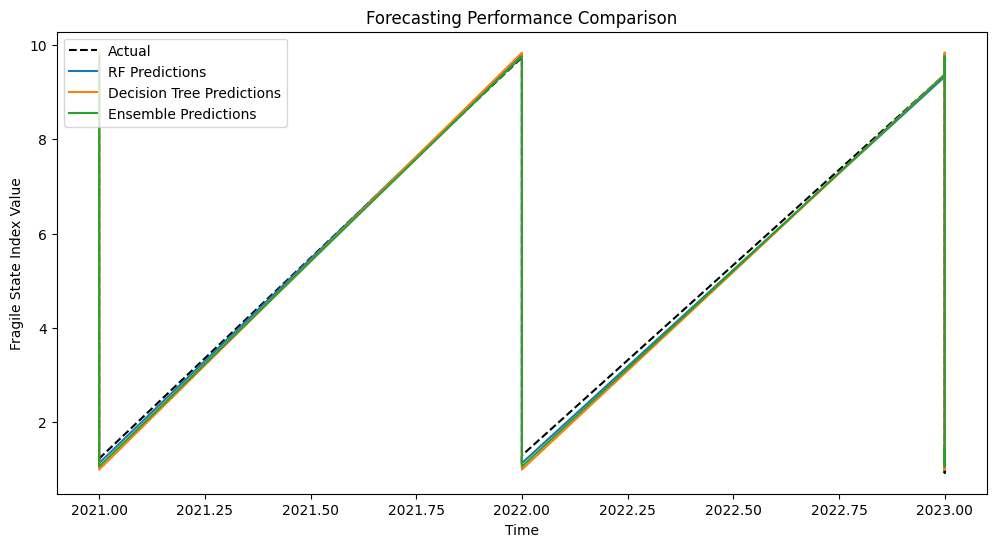

In [58]:
# Plotting predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(validation_data['Year'], y_val, label='Actual', linestyle='--', color='black')
plt.plot(validation_data['Year'], y_pred_rf, label='RF Predictions')
plt.plot(validation_data['Year'], y_pred_dt, label='Decision Tree Predictions')
plt.plot(validation_data['Year'], y_pred_ensemble, label='Ensemble Predictions')
plt.title('Forecasting Performance Comparison')
plt.xlabel('Time')
plt.ylabel('Fragile State Index Value')
plt.legend()
plt.show()

In [59]:
future_years = range(2024, 2034)
country_labels = range(0, 141)
continent_labels = range(0, 6)
data = {
    'Country_Label': list(country_labels) * len(range(2024, 2034)),
    'Year': sorted(list(future_years) * len(range(0, 141))),
}
data['Continent_Label'] = [country_continent_mapping[label] for label in data['Country_Label']]
X_future = pd.DataFrame(data)
X_future = X_future[['Country_Label', 'Continent_Label', 'Year']]

y_pred_future = ensemble_model.predict(X_future)

future_predictions = pd.DataFrame({
    'Country_Label': X_future['Country_Label'],
    'Continent_Label': X_future['Continent_Label'],
    'Year': X_future['Year'],
    'S_avg': y_pred_future
})

combined_future = pd.concat([df[['Country_Label', 'Continent_Label', 'Year', 'S_avg']], future_predictions], ignore_index=True)
combined_future['Country'] = label_encoder.inverse_transform(combined_future['Country_Label'])
combined_future['Continent'] = label_encoder.inverse_transform(combined_future['Continent_Label'])

fig = px.choropleth(
    combined_future,
    locations="Country",
    locationmode="country names",
    color="S_avg",
    animation_frame="Year",
    color_continuous_scale="Inferno_r",
    title="Fragility Index Heatmap Over Years",
    labels={'S_avg': 'Fragility Index'}
)

fig.update_layout(width=1200, height=800)
fig.show()

In [60]:
final['S_avg'] = combined_future['S_avg']

In [61]:
combined_future[combined_future['Country_Label'] == 140].head()

,Country_Label,Continent_Label,Year,S_avg,Country,Continent
4,140,0,2006,8.866667,Zimbabwe,Afghanistan
144,140,0,2007,8.466667,Zimbabwe,Afghanistan
284,140,0,2008,8.566667,Zimbabwe,Afghanistan
424,140,0,2009,8.833333,Zimbabwe,Afghanistan
567,140,0,2010,8.500000,Zimbabwe,Afghanistan


In [62]:
combined_future.head()

,Country_Label,Continent_Label,Year,S_avg,Country,Continent
0,119,0,2006,9.700000,Sudan,Afghanistan
1,29,0,2006,9.666667,Congo Democratic Republic,Afghanistan
2,31,0,2006,8.800000,Cote d'Ivoire,Afghanistan
3,61,1,2006,9.066667,Iraq,Albania
4,140,0,2006,8.866667,Zimbabwe,Afghanistan


In [63]:
final.head()

,Country,Year,Continent,Total,E_avg,P_avg,C_avg,S_avg
0,Sudan,2006,Afghanistan,112.3,8.600000,9.600000,9.533333,9.700000
1,Congo Democratic Republic,2006,Afghanistan,110.1,8.366667,9.166667,9.500000,9.666667
2,Cote d'Ivoire,2006,Afghanistan,109.2,8.500000,9.300000,9.800000,8.800000
3,Iraq,2006,Albania,109.0,8.666667,8.833333,9.766667,9.066667
4,Zimbabwe,2006,Afghanistan,108.9,9.333333,9.300000,8.800000,8.866667


In [64]:
final = final[final['Year'] <= 2024]
final.head()

,Country,Year,Continent,Total,E_avg,P_avg,C_avg,S_avg
0,Sudan,2006,Afghanistan,112.3,8.600000,9.600000,9.533333,9.700000
1,Congo Democratic Republic,2006,Afghanistan,110.1,8.366667,9.166667,9.500000,9.666667
2,Cote d'Ivoire,2006,Afghanistan,109.2,8.500000,9.300000,9.800000,8.800000
3,Iraq,2006,Albania,109.0,8.666667,8.833333,9.766667,9.066667
4,Zimbabwe,2006,Afghanistan,108.9,9.333333,9.300000,8.800000,8.866667


In [67]:
df = final
app = dash.Dash(__name__)
app.layout = html.Div([
    html.Label('Select Country:'),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].unique()],
        value=df['Country'].unique()[0]
    ),
    dcc.Graph(id='line-plot'),
])

@app.callback(
    Output('line-plot', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_line_plot(selected_country):
    selected_df = df[df['Country'] == selected_country]

    fig = make_subplots(rows=5, cols=1, subplot_titles=('Total', 'E_avg', 'P_avg', 'C_avg', 'S_avg'))

    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['Total'], mode='lines+markers'), row=1, col=1)
    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['E_avg'], mode='lines+markers'), row=2, col=1)
    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['P_avg'], mode='lines+markers'), row=3, col=1)
    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['C_avg'], mode='lines+markers'), row=4, col=1)

    fig.add_trace(go.Scatter(x=selected_df['Year'], y=selected_df['S_avg'], mode='lines+markers'), row=5, col=1)
    fig.update_layout(height=600, title=f'Data for {selected_country}', showlegend=False)

    fig.update_xaxes(title_text='Year', row=5, col=1, tickmode='array', tickvals=selected_df['Year'], ticktext=selected_df['Year'].astype(str))

    return fig
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>